In [1]:
!pip install pandas_datareader


In [41]:
import pandas as pd
import numpy as np
from datetime import datetime
from pandas_datareader import data
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False


# datetime 표준라이브러리

In [6]:
dt = datetime(2022, 1, 18, 13, 4,10)
print(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)

2022 1 18 13 4 10


In [8]:
cur = datetime.now()
cur

datetime.datetime(2022, 2, 18, 13, 5, 22, 755264)

### 시계열 데이터의 정의
- 인덱스가 datetime 타입
- 시계열데이터의 indexing, slicing을 사용가능
- resampl ( group 함수 ) 사용가능


In [19]:
data1 = [[1,2],[3,4],[5,8],[7,6],[9,12],[11,10],[13,16],[15,20]]
df = pd.DataFrame( data1 )
df.index=['2019-01-01','2019-02-01','2019-03-01','2019-04-01',
          '2019-05-01','2019-06-01','2019-07-01','2019-08-01']
df

,0,1
2019-01-01,1,2
2019-02-01,3,4
2019-03-01,5,8
2019-04-01,7,6
2019-05-01,9,12
2019-06-01,11,10
2019-07-01,13,16
2019-08-01,15,20


In [20]:
#index가 object 타입
print(df.index)
df.index = pd.to_datetime(df.index)
print(df.index)

Index(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
       '2019-06-01', '2019-07-01', '2019-08-01'],
      dtype='object')
DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01'],
              dtype='datetime64[ns]', freq=None)


In [21]:
data1 = [[1,2],[3,4],[5,8],[7,6],[9,12],[11,10],[13,16],[15,20]]
df = pd.DataFrame( data1 )

df.index=[datetime(2019,1,1),datetime(2019,2,1),datetime(2019,3,1),
          datetime(2019,4,1),datetime(2019,5,1),datetime(2019,6,1),
          datetime(2019,7,1),datetime(2019,8,1) ]
# index가 datetime 형
df.index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01'],
              dtype='datetime64[ns]', freq=None)

In [25]:
df.index=['2019년1월1일','2019년2월1일','2019년3월1일','2019년4월1일',
          '2019년5월1일','2019년6월1일','2019년7월1일','2019년8월1일']
df.index
# df.index = pd.to_datetime(df.index)  # format error
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior.
df.index = pd.to_datetime(df.index, format='%Y년%m월%d일')
print(df.index)

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01'],
              dtype='datetime64[ns]', freq=None)


In [26]:
df.columns=['A', 'B']
df

,A,B
2019-01-01,1,2
2019-02-01,3,4
2019-03-01,5,8
2019-04-01,7,6
2019-05-01,9,12
2019-06-01,11,10
2019-07-01,13,16
2019-08-01,15,20


### 이동평균 (추세 볼때 필요)

In [31]:
df.rolling(window=3).mean()

,A,B
2019-01-01,NaN,NaN
2019-02-01,NaN,NaN
2019-03-01,3.0,4.666667
2019-04-01,5.0,6.000000
2019-05-01,7.0,8.666667
2019-06-01,9.0,9.333333
2019-07-01,11.0,12.666667
2019-08-01,13.0,15.333333


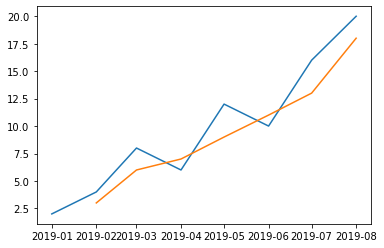

In [35]:
plt.plot(df.index, df['B'])
plt.plot(df.index, df.rolling(window=2).mean()['B'])
plt.show()

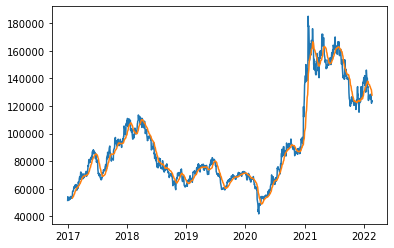

In [48]:
# data.get_data_yahoo(종목코드, 시작날짜, 끝날짜)
lgDF = data.get_data_yahoo('066570.KS', '2017-01-01')
lgDF.index

plt.plot(lgDF.index, lgDF['Close'])
plt.plot(lgDF.index, lgDF.rolling(window=20).mean()['Close'])
plt.show()

### 시계열데이터만 적용되는 인덱스 슬라이싱


In [59]:
# 시리즈나 데이터 프레임경우 2019의 컬럼을 가져옴 저렇게하면
lgDF['2019']

C:\Users\heemin.lee\AppData\Local\Temp/ipykernel_9408/564591388.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  lgDF['2019']


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,64200.0,62700.0,63300.0,62800.0,568844.0,61161.425781
2019-01-03,64100.0,62100.0,63100.0,62900.0,604561.0,61258.816406
2019-01-04,63400.0,61100.0,63000.0,62200.0,602100.0,60577.078125
2019-01-07,64700.0,62700.0,63100.0,64200.0,660173.0,62524.898438
2019-01-08,63700.0,61200.0,63700.0,61900.0,1338626.0,60284.910156
...,...,...,...,...,...,...
2019-12-23,72600.0,71900.0,72600.0,72500.0,257344.0,70608.328125
2019-12-24,72700.0,71900.0,72500.0,71900.0,220741.0,70023.984375
2019-12-26,72200.0,71200.0,72000.0,71300.0,372424.0,69439.648438


In [60]:
lgDF['2019-02']

C:\Users\heemin.lee\AppData\Local\Temp/ipykernel_9408/2766631694.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  lgDF['2019-02']


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-02-01,66300.0,65200.0,66300.0,65400.0,1039069.0,63693.589844
2019-02-07,66400.0,65300.0,65900.0,65900.0,663706.0,64180.539062
2019-02-08,65700.0,64700.0,65500.0,64800.0,690327.0,63109.242188
2019-02-11,69600.0,64900.0,65000.0,69300.0,1987125.0,67491.820312
2019-02-12,72900.0,70300.0,70300.0,71900.0,2499697.0,70023.984375
2019-02-13,73900.0,71900.0,72700.0,72100.0,1310740.0,70218.773438
2019-02-14,73000.0,70500.0,70500.0,72300.0,799937.0,70413.546875
2019-02-15,73000.0,71400.0,72700.0,72000.0,598744.0,70121.375000
2019-02-18,73400.0,71100.0,73200.0,72000.0,585460.0,70121.375000


In [61]:
lgDF['2019-02':'2019-7']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-02-01,66300.0,65200.0,66300.0,65400.0,1039069.0,63693.589844
2019-02-07,66400.0,65300.0,65900.0,65900.0,663706.0,64180.539062
2019-02-08,65700.0,64700.0,65500.0,64800.0,690327.0,63109.242188
2019-02-11,69600.0,64900.0,65000.0,69300.0,1987125.0,67491.820312
2019-02-12,72900.0,70300.0,70300.0,71900.0,2499697.0,70023.984375
...,...,...,...,...,...,...
2019-07-25,70400.0,69300.0,69800.0,69700.0,458863.0,67881.390625
2019-07-26,69600.0,68100.0,69000.0,68600.0,614213.0,66810.093750
2019-07-29,69700.0,68000.0,68300.0,68600.0,377474.0,66810.093750


In [62]:
lgDF[:'2019']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,52300.0,51600.0,51800.0,51600.0,431474.0,49438.648438
2017-01-03,54400.0,51800.0,51800.0,54300.0,1715000.0,52025.554688
2017-01-04,54500.0,53100.0,54200.0,53800.0,1262418.0,51546.496094
2017-01-05,55700.0,53400.0,54000.0,53600.0,1428250.0,51354.875000
2017-01-06,54000.0,52400.0,53800.0,52600.0,1382362.0,50396.761719
...,...,...,...,...,...,...
2019-12-23,72600.0,71900.0,72600.0,72500.0,257344.0,70608.328125
2019-12-24,72700.0,71900.0,72500.0,71900.0,220741.0,70023.984375
2019-12-26,72200.0,71200.0,72000.0,71300.0,372424.0,69439.648438


In [63]:
lgDF>=2019

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,True,True,True,True,True,True
2017-01-03,True,True,True,True,True,True
2017-01-04,True,True,True,True,True,True
2017-01-05,True,True,True,True,True,True
2017-01-06,True,True,True,True,True,True
...,...,...,...,...,...,...
2022-02-14,True,True,True,True,True,True
2022-02-15,True,True,True,True,True,True
2022-02-16,True,True,True,True,True,True


In [64]:
lgDF[lgDF.index >= '2019']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,64200.0,62700.0,63300.0,62800.0,568844.0,61161.425781
2019-01-03,64100.0,62100.0,63100.0,62900.0,604561.0,61258.816406
2019-01-04,63400.0,61100.0,63000.0,62200.0,602100.0,60577.078125
2019-01-07,64700.0,62700.0,63100.0,64200.0,660173.0,62524.898438
2019-01-08,63700.0,61200.0,63700.0,61900.0,1338626.0,60284.910156
...,...,...,...,...,...,...
2022-02-14,126000.0,121500.0,124000.0,123000.0,982772.0,123000.000000
2022-02-15,124500.0,120500.0,123500.0,122000.0,828330.0,122000.000000
2022-02-16,125000.0,122500.0,124500.0,123000.0,679538.0,123000.000000


### 집계

In [68]:
lgDF['year'] = lgDF.index.year

In [70]:
lgDF['month'] = lgDF.index.month

In [78]:
### 연도별 주가의 평균
lgDF.groupby([lgDF.index.year, lgDF.index.month]).mean()

High            Low           Open          Close  \
Date Date                                                               
2017 1      54080.000000   52590.000000   53210.000000   53365.000000   
     2      61450.000000   59850.000000   60750.000000   60760.000000   
     3      67813.636364   65972.727273   66990.909091   67000.000000   
     4      70930.000000   69255.000000   70190.000000   70020.000000   
     5      80536.842105   78557.894737   79436.842105   79768.421053   
...                  ...            ...            ...            ...   
2021 10    126157.894737  122026.315789  124289.473684  123631.578947   
     11    125886.363636  121840.909091  123931.818182  123454.545455   
     12    131340.909091  126954.545455  128772.727273  129590.909091   
2022 1     138736.842105  133368.421053  136157.894737  135710.526316   
     2     126791.666667  123750.000000  125666.666667  124958.333333   

                 Volume      Adj Close    year  month  
Date Date                                              
2017 1     9.578222e+05   51129.718945  2017.0    1.0  
     2     1.082006e+06   58214.966797  2017.0    2.0  
     3     1.266034e+06   64193.593395  2017.0    3.0  
     4     8.959922e+05   67087.098047  2017.0    4.0  
     5     1.069715e+06   76427.189145  2017.0    5.0  
...                 ...            ...     ...    ...  
2021 10    9.867499e+05  122870.079359  2021.0   10.0  
     11    1.012647e+06  122694.135653  2021.0   11.0  
     12    1.074345e+06  128870.675781  2021.0   12.0  
2022 1     1.561885e+06  135710.526316  2022.0    1.0  
     2     7.324607e+05  124958.333333  2022.0    2.0  

[62 rows x 8 columns]

### 시계열데이터 전용 집계함수
- resample
- http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

In [88]:
lgDF.resample('A').mean() # 연별 집계 평균

,High,Low,Open,Close,Volume,Adj Close,year,month
Date,,,,,,,,
2017-12-31,78164.315353,75950.207469,77032.780083,77034.854772,1.167600e+06,73811.550538,2017.0,6.423237
2018-12-31,87758.606557,85020.491803,86477.049180,86194.262295,8.193217e+05,82924.285204,2018.0,6.483607
2019-12-31,71433.739837,69786.991870,70622.357724,70583.333333,6.424514e+05,68747.731977,2019.0,6.520325
2020-12-31,74923.588710,72375.604839,73572.379032,73651.209677,1.241898e+06,72502.336095,2020.0,6.516129
2021-12-31,150032.258065,144697.580645,147419.354839,147086.693548,1.631883e+06,146187.640972,2021.0,6.556452
2022-12-31,134112.903226,129645.161290,132096.774194,131548.387097,1.240818e+06,131548.387097,2022.0,1.387097


In [87]:
lgDF.resample('M').mean() # 월별 집계 평균

,High,Low,Open,Close,Volume,Adj Close,year,month
Date,,,,,,,,
2017-01-31,54080.000000,52590.000000,53210.000000,53365.000000,9.578222e+05,51129.718945,2017.0,1.0
2017-02-28,61450.000000,59850.000000,60750.000000,60760.000000,1.082006e+06,58214.966797,2017.0,2.0
2017-03-31,67813.636364,65972.727273,66990.909091,67000.000000,1.266034e+06,64193.593395,2017.0,3.0
2017-04-30,70930.000000,69255.000000,70190.000000,70020.000000,8.959922e+05,67087.098047,2017.0,4.0
2017-05-31,80536.842105,78557.894737,79436.842105,79768.421053,1.069715e+06,76427.189145,2017.0,5.0
...,...,...,...,...,...,...,...,...
2021-10-31,126157.894737,122026.315789,124289.473684,123631.578947,9.867499e+05,122870.079359,2021.0,10.0
2021-11-30,125886.363636,121840.909091,123931.818182,123454.545455,1.012647e+06,122694.135653,2021.0,11.0
2021-12-31,131340.909091,126954.545455,128772.727273,129590.909091,1.074345e+06,128870.675781,2021.0,12.0


In [86]:
lgDF.resample('W').mean() # 주간 집계 평균

,High,Low,Open,Close,Volume,Adj Close,year,month
Date,,,,,,,,
2017-01-08,54180.0,52460.0,53120.0,53180.0,1243900.80,50952.467187,2017.0,1.00
2017-01-15,53200.0,51760.0,52460.0,52720.0,968264.20,50511.735938,2017.0,1.00
2017-01-22,53880.0,52800.0,53220.0,53500.0,714977.60,51259.064844,2017.0,1.00
2017-01-29,54900.0,53325.0,54175.0,53725.0,786015.75,51474.639648,2017.0,1.00
2017-02-05,58050.0,55975.0,56625.0,57450.0,1566933.75,55043.614258,2017.0,1.75
...,...,...,...,...,...,...,...,...
2022-01-23,141000.0,135900.0,139300.0,137800.0,1491333.20,137800.000000,2022.0,1.00
2022-01-30,132100.0,127500.0,130400.0,129500.0,1117637.60,129500.000000,2022.0,1.00
2022-02-06,129250.0,125500.0,128000.0,127000.0,975806.00,127000.000000,2022.0,2.00
